<a href="https://colab.research.google.com/github/swarupyeole11/ML_Journey/blob/main/Covid_19_prediction_using_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'covidowid:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1910869%2F3669050%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240905%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240905T020151Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db231e4e5d90f5305d3babd6ff3dc28c9282ad4788717ec50d0b2c7914c7aa7a5ad12ba84ed69494931451ff2f0db91bb70a771fbe3bb1701660afa7b032f198fb6ff2cd2c40b92da9e5b6b9f24fb7741f7224bd97c8c57c719f8990d0fb9c1e95f8c84c274e351370f45419822c2eb0f7c809d858066279f0eb946842b9d014f8172ee76dcc7d2c596e1342a5853197d49a5e51c05e8a66f49e5615b023d3e2d8f86e4efcd2f48e6be76a854406852fceb17f7f462e5cda7d592a86a6ed66a931e30b2b3c740f1897c59e261cb7eb2b766ae942d7c796cb842ed6b00b338757e1a41f7d19a3c70b28a40c38e9888314871496d28888c1ad05673e87fad67d726'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 10578551 bytes downloaded
Downloaded and uncompressed: covidowid
Data source import complete.


## **Covid-19 prediction using Neural Network**


## Abstract


This notebook is devoted to predicting the COVID-19 spread dynamics in the world using neural networks of different structures. We will see how to make predictions based on linear regression, back propagation  and long short-term memory neural networks


## Introduction


Today there is a lot of open data about the spread of COVID-19 in the world. However, few tools are presented to predict  these processes.

3 different mathematical models for the forecast calculation will taken.

To do this, the division of the DataSet into training and test sets will be demonstrated, normalize data and make preliminary analysis.

It will be shown how to build models and DataSets for using 2 different neural networks.

The next step is to compare the accuracy and adequacy of the obtained models.


## Steps or Stages


It consists of four stages:

*   Download and preliminary analysis of data
*   Linear Regression
*   Back Propagation NN
*   Long Short-Term Memory - LSTM



In first stage we pre-prepare data for analysis:

*   change the data types of columns
*   rows filtering
*   elimination of missing data
*   DataSet transformation
*   data normalization

During the next steps, we will demonstrate 3 different models .


## Prerequisites

*   Python
*   Pandas
*   Statistics
*   NumPy
*   Matplotlib
*   Keras
*   Scikit-Learn


## Objectives


## Required libraries Importing


Some libraries should be imported .


In [2]:
import pandas as pd
import numpy as np


In [3]:
covid_word = pd.read_csv('../input/covidowid/owid-covid-data.csv')
covid_word

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187796,ZWE,Africa,Zimbabwe,2022-05-15,249206.0,0.0,122.000,5482.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187797,ZWE,Africa,Zimbabwe,2022-05-16,249431.0,225.0,127.857,5484.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187798,ZWE,Africa,Zimbabwe,2022-05-17,249748.0,317.0,158.000,5484.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187799,ZWE,Africa,Zimbabwe,2022-05-18,250007.0,259.0,195.000,5486.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Let's study our DataSet. As you can see, it consist of 159321 rows × 67 columns. There is some missing data are observed in the DataSet. We should be sure that Python recognized types of data correctly.


In [4]:
covid_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187801 entries, 0 to 187800
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    187801 non-null  object 
 1   continent                                   176870 non-null  object 
 2   location                                    187801 non-null  object 
 3   date                                        187801 non-null  object 
 4   total_cases                                 180399 non-null  float64
 5   new_cases                                   180190 non-null  float64
 6   new_cases_smoothed                          179016 non-null  float64
 7   total_deaths                                162023 non-null  float64
 8   new_deaths                                  162021 non-null  float64
 9   new_deaths_smoothed                         160860 non-null  float64
 

As you can see, 66 columns of COVID-19 data were recognized correctly (float64). First 4 columns and tests_units were recognized as objects. Let's investigate them:


In [ ]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
187796,ZWE,Africa,Zimbabwe,tests performed
187797,ZWE,Africa,Zimbabwe,tests performed
187798,ZWE,Africa,Zimbabwe,tests performed
187799,ZWE,Africa,Zimbabwe,tests performed


Let's show information about the field date.


In [ ]:
covid_word['date']

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
187796    2022-05-15
187797    2022-05-16
187798    2022-05-17
187799    2022-05-18
187800    2022-05-19
Name: date, Length: 187801, dtype: object

### Сhange the data types of columns


As you can see, the columns: 'iso_code', 'continent', 'location', 'tests_units' have many repetitions and should be assigned to categorical fields **pandas.astype()**.

The field 'data' should be converted into DataTime type **pandas.to_datetime**  
To see the results we can use **pandas.describe()**.


In [ ]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields] =covid_word[fields].astype('category')
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])
covid_word[fields].describe()

,iso_code,continent,location,tests_units
count,187801,176870,187801,101893
unique,244,6,244,4
top,ARG,Africa,Mexico,tests performed
freq,870,43543,870,75951


### Rows filtering


As we can see, the DataSet contains information about 6 continents and 238 countries.
The field 'tests_units' consist of 4 categories. To show a list of countries, we can use **pandas.Series.cat.categories**.


In [ ]:
covid_word['location'].cat.categories

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna',
       'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=244)

Let's investigate the dynamics of new cases of COVID-19 for a separate country. We will use India for saving models and further forecast. You can use your country. Let's use a pandas filter to do this.


In [ ]:
covid_word.index = covid_word['date']
c_covid = covid_word[covid_word['location'] == "India"]
c_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,IND,Asia,India,2020-01-30,1.0000,1.0000,NaN,NaN,NaN,NaN,...,1.9000,20.6000,59.5500,0.5300,69.6600,0.6450,NaN,NaN,NaN,NaN
2020-01-31,IND,Asia,India,2020-01-31,1.0000,0.0000,NaN,NaN,NaN,NaN,...,1.9000,20.6000,59.5500,0.5300,69.6600,0.6450,NaN,NaN,NaN,NaN
2020-02-01,IND,Asia,India,2020-02-01,1.0000,0.0000,NaN,NaN,NaN,NaN,...,1.9000,20.6000,59.5500,0.5300,69.6600,0.6450,NaN,NaN,NaN,NaN
2020-02-02,IND,Asia,India,2020-02-02,2.0000,1.0000,NaN,NaN,NaN,NaN,...,1.9000,20.6000,59.5500,0.5300,69.6600,0.6450,NaN,NaN,NaN,NaN
2020-02-03,IND,Asia,India,2020-02-03,3.0000,1.0000,NaN,NaN,NaN,NaN,...,1.9000,20.6000,59.5500,0.5300,69.6600,0.6450,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,IND,Asia,India,2022-05-15,"43,123,801.0000","2,202.0000","2,628.5710","524,241.0000",27.0000,21.1430,...,1.9000,20.6000,59.5500,0.5300,69.6600,0.6450,NaN,NaN,NaN,NaN
2022-05-16,IND,Asia,India,2022-05-16,"43,125,370.0000","1,569.0000","2,525.8570","524,260.0000",19.0000,22.4290,...,1.9000,20.6000,59.5500,0.5300,69.6600,0.6450,NaN,NaN,NaN,NaN
2022-05-17,IND,Asia,India,2022-05-17,"43,127,199.0000","1,829.0000","2,373.2860","524,293.0000",33.0000,19.4290,...,1.9000,20.6000,59.5500,0.5300,69.6600,0.6450,NaN,NaN,NaN,NaN


Let's choose the fields 'new_cases', 'new_cases_smoothed' for forecasting. First of all, we should visualize this data.


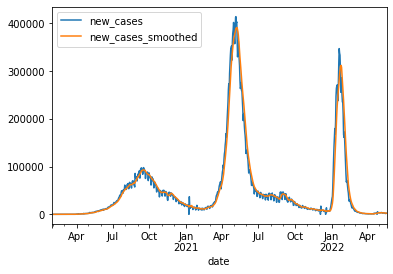

In [ ]:
import matplotlib.pyplot as plt
fields = ['new_cases', 'new_cases_smoothed']
c_covid[fields].plot()
plt.show()

### Elimination of missing data


As you can see, there are large fluctuations in the new cases plot. Let's try to make a forecast for these waves.
First of all, we should delete missing data using **pandas.DataFrame.dropna()**


In [ ]:
c_covid = c_covid[fields].dropna()
c_covid

,new_cases,new_cases_smoothed
date,,
2020-02-04,0.0000,0.4290
2020-02-05,0.0000,0.4290
2020-02-06,0.0000,0.2860
2020-02-07,0.0000,0.2860
2020-02-08,0.0000,0.2860
...,...,...
2022-05-15,"2,202.0000","2,628.5710"
2022-05-16,"1,569.0000","2,525.8570"
2022-05-17,"1,829.0000","2,373.2860"


### Data transformation


 To check for dependencies, it is necessary to perform a correlation analysis between them. This requires:

1.  duplicating of data and moving it vertically down for a certain number of days (lag)
2.  deleting the missing data at the beginning and end **pandas.DataFrame.shift()**
3.  calculating the correlation coefficient between the obtained series.

It is convenient to create a separate function for lag:


In [ ]:
def lag_correlation_ts(y, x, lag):
    """

    y: fixed
    x: shifted
    lag: lag for shifting
    r: DataFrame of lags correlation coefficients
    """
    r = [0] * (lag + 1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"

    for i in range(0, lag + 1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), how='outer')
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ['Lag']
    r.columns = ['Correlation']
    return r

Let's create a target DataSet.


In [ ]:
y_dataset = c_covid['new_cases']
y_dataset

date
2020-02-04       0.0000
2020-02-05       0.0000
2020-02-06       0.0000
2020-02-07       0.0000
2020-02-08       0.0000
                ...    
2022-05-15   2,202.0000
2022-05-16   1,569.0000
2022-05-17   1,829.0000
2022-05-18   2,364.0000
2022-05-19   2,259.0000
Name: new_cases, Length: 836, dtype: float64

Let's test a 50-day lag.


     Correlation
Lag             
0         1.0000
1         0.9947
2         0.9867
3         0.9783
4         0.9680
5         0.9562
6         0.9440
7         0.9289
8         0.9065
9         0.8820
10        0.8580
11        0.8334
12        0.8080
13        0.7834
14        0.7566
15        0.7248
16        0.6928
17        0.6625
18        0.6325
19        0.6030
20        0.5753
21        0.5471
22        0.5156
23        0.4851
24        0.4572
25        0.4302
26        0.4044
27        0.3805
28        0.3567
29        0.3309
30        0.3062
31        0.2839
32        0.2625
33        0.2422
34        0.2235
35        0.2051
36        0.1847
37        0.1656
38        0.1484
39        0.1318
40        0.1162
41        0.1023
42        0.0884
43        0.0728
44        0.0583
45        0.0453
46        0.0330
47        0.0212
48        0.0110
49        0.0008
50       -0.0110


<AxesSubplot:xlabel='Lag'>

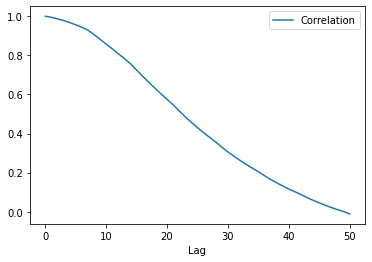

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format
l = pd.DataFrame(lag_correlation_ts(y_dataset, y_dataset, 50))
print(l)
l.plot()

To automate this process, let's make a universal function for time series transformation to create this DataSet.


In [ ]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

 When forecasting time series, the input and output fields are the same, only shifted by the lag.


In [ ]:
dataset = series_to_supervised(pd.DataFrame(y_dataset), y_dataset, 14)
dataset

,new_cases(t-0),new_cases(t-1),new_cases(t-2),new_cases(t-3),new_cases(t-4),new_cases(t-5),new_cases(t-6),new_cases(t-7),new_cases(t-8),new_cases(t-9),new_cases(t-10),new_cases(t-11),new_cases(t-12),new_cases(t-13),new_cases(t-14),new_cases
date,,,,,,,,,,,,,,,,
2020-02-18,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-19,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-20,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-21,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-22,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,"2,202.0000","2,487.0000","2,858.0000","2,841.0000","2,827.0000","2,897.0000","2,288.0000","3,207.0000","3,451.0000","3,805.0000","3,545.0000","3,275.0000","3,205.0000","2,568.0000","3,157.0000","2,202.0000"
2022-05-16,"1,569.0000","2,202.0000","2,487.0000","2,858.0000","2,841.0000","2,827.0000","2,897.0000","2,288.0000","3,207.0000","3,451.0000","3,805.0000","3,545.0000","3,275.0000","3,205.0000","2,568.0000","1,569.0000"
2022-05-17,"1,829.0000","1,569.0000","2,202.0000","2,487.0000","2,858.0000","2,841.0000","2,827.0000","2,897.0000","2,288.0000","3,207.0000","3,451.0000","3,805.0000","3,545.0000","3,275.0000","3,205.0000","1,829.0000"


As you can see, the first and last columns contain the same target data.
Now we should create input (**X**) and output (**Y**) .


In [ ]:
col = dataset.columns
X, Y = dataset[col[1:-1]], dataset[col[-1]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['new_cases(t-1)', 'new_cases(t-2)', 'new_cases(t-3)', 'new_cases(t-4)',
       'new_cases(t-5)', 'new_cases(t-6)', 'new_cases(t-7)', 'new_cases(t-8)',
       'new_cases(t-9)', 'new_cases(t-10)', 'new_cases(t-11)',
       'new_cases(t-12)', 'new_cases(t-13)', 'new_cases(t-14)'],
      dtype='object')
Target: new_cases


### Data normalization


After that, we should normalize all the data. To do this, the **sklearn.preprocessing.MinMaxScaler** module should be used.
It allows us to normalize **fit_transform()** and convert back all the data easily: **inverse_transform()**.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

After that, we are going to form training and test DataSets using **sklearn.model_selection.train_test_split()**.

We will make them at the ratio of 73/27. Without shuffling. It means, that test samples are located in the end of **X** and **Y** DataSets.

Input normalized DataSets: **X_train, X_test**

Target normalized DataSets: **y_train, y_test**


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.32, shuffle=False)

All the data is normalized now. However, in order to compare to results, we need real scale data of the training and test DataSet:


In [ ]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

Target real scale DataSets: **res_train, res_test**.


# Linear Regression


First of all, we should create a model. We will test three type of models. A Linear regression, a Multilayer Neural Network with Backpropagation and a Long Short-Term Memory Neural Network.
Let's create a **LinearRegression()**


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

After that, our model should be fitted on the training DataSet. Regardless of the model type, the function fit() is used to do this.


In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

Then we can test it on the test DataSet and use it for prognostication.


In [ ]:
y_pred_test_ln = regressor.predict(X_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

Let's analyze the results accuracy using **sklearn.metrics**.


In [ ]:
from sklearn import metrics
print("Correlation train", regressor.score(X_train, y_train))
print("Correlation test", regressor.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.9966993360861955
Correlation test 0.9887010809896141
Mean Absolute Error: 39825.00426717726
Mean Squared Error: 7272313854.298441
Root Mean Squared Error: 85277.8626274043


# Back Propagation NN


The modern approach to the establishment of complex functional dependencies is the use of neural networks. A classical neural network is a **multilayer neural network with back propagation**.

To do this, we will use the **keras** framework.
First of all, we should create a Neural Network model as a separate function.

A neural network is a sequence of layers. The function **Sequential()** is used to create a network.

Let's create a network that consists of 2 hidden layers. Each of which consists of 100 neurons. **keras.layers.Dense()**.

To avoid retraining problems, we will use additional layers **keras.layers.Dropout()**.

The output layer will consist of one neuron, since we have only one value at the output.

The model should be compiled for fitting and predicting: **keras.Model.compile()**.


In [ ]:
def BP_model(X):
    """
    Multilayer neural network with back propagation.
    X: Input DataSet
    return: keras NN model
    """
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Once the model function is built, it is necessary to create a neural network directly and specify the learning parameters: **keras.wrappers.scikit_learn.KerasRegressor()**.

Also we should define the number of fitting **epoch and batch size**.


In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
epochs = 1000

batch_size=int(y_train.shape[0]*.1)

estimator = KerasRegressor(build_fn=BP_model, X=X_train, epochs=epochs, batch_size=batch_size, verbose=1)

Now, let’s train our model for **1000** epochs.
It should be noted that the fitting process is very slow. Therefore, we saved our fitted model to a file.
To save time, we will upload the fitted model.
If you like, you can leave the parameter **fitting on True** to refit the model.
If you like, you can leave the parameter **fitting_save on True** to resave the model.


In [ ]:
fitting = True
fitting_save = True

import pickle

if fitting:
    history=estimator.fit(X_train,y_train, validation_data=(X_test,y_test)) # Fitting model
    if fitting_save:
        # Save model
        estimator.model.save('BP_saved_model.h5')
        print("Saved model to disk")
        with open('history.pickle', 'wb') as f:
            pickle.dump(history.history, f)
# load model
from keras.models import load_model
estimator = KerasRegressor(build_fn=BP_model, X=X_train, epochs=epochs, batch_size=batch_size, verbose=1)
estimator.model = load_model('BP_saved_model.h5')
with open('history.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Epoch 1/1000
11/11 [==============================] - 1s 40ms/step - loss: 0.0376 - val_loss: 0.0144
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0094 - val_loss: 0.0132
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0055 - val_loss: 0.0071
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0065
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0051
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0043
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 8/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 9/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 10/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.001

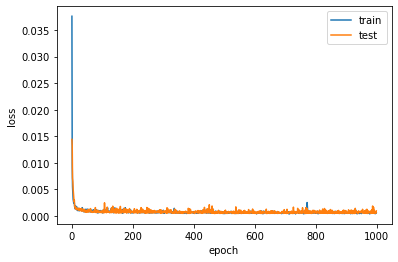

In [ ]:
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

As you can see, a Neural Network is well-fitted and no overfitting is observed.
Let's calculate a prediction of the training (**res_train_ANN**) an test (**res_test_ANN**) sets.


Let's calculate a forecast and make an inverse normalization to real scale.


In [ ]:
res_tr=estimator.predict(X_train)
res_ts=estimator.predict(X_test)
res_train_ANN=scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

5/5 [==============================] - 0s 2ms/step


Let's compare the accuracy of a Linear Regression and a Neural Network.


In [ ]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

Correlation train 0.9984492128139618
Correlation train 0.9925286990326266
Mean Absolute Error: 42038.525752372436
Mean Squared Error: 8547903241.246717
Root Mean Squared Error: 92454.87137650842


We got slightly better results for a Neural Network than for a Linear Regression.


# Long Short-Term Memory - LSTM


Unlike standard feedforward neural networks, **LSTM** has feedback connections. It can process not only single data points, but also entire sequences of data (such as speech, video or time series).

In case of time series, the neural network has one input and one output. However, there should be a vector of time series values for the previous time period on the input.


To do this, we should transform input DataSets into 3D shape.


In [ ]:
train_x_LSTM = X_train.reshape((X_train.shape[0], 1, 14))
test_x_LSTM = X_test.reshape((X_test.shape[0], 1, 14))

Let's create an LSTM Neural Network consisting of one **LSTM** layer and one BP layer like in the previous case.
In this case our NN will consist of 7 LSTM and 7 BP neurons only.


In [ ]:
from keras.layers import LSTM

batch_size=int(y_train.shape[0]*.1)
model = Sequential()
model.add(LSTM(7, input_shape=(train_x_LSTM.shape[1], train_x_LSTM.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(7, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1])) #activation='sigmoid'
model.compile(loss='mean_squared_error', optimizer='adam')



All subsequent steps of learning, storing, reading and predicting are similar to the ones we used with the previous neural network. You can see that only 420 epochs are enough for an LSTM.


In [ ]:
fitting = True
fitting_save = True
epochs = 420

if fitting:
    history = model.fit(train_x_LSTM, y_train, epochs=epochs, batch_size=batch_size, validation_data=(test_x_LSTM, y_test), verbose=1, shuffle=False)
    if fitting_save:
    # serialize model to JSON
        model_json = model.to_json()
        with open("LSTM_model.json", "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        model.save_weights("LSTM_model.h5")
        print("Saved model to disk")
        with open('history_LSTM.pickle', 'wb') as f:
            pickle.dump(history.history, f)
# load model
from keras.models import model_from_json
json_file = open('LSTM_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("LSTM_model.h5")
with open('history_LSTM.pickle', 'rb') as f:
    history = pickle.load(f)
print("Loaded model from disk")

Epoch 1/420
11/11 [==============================] - 3s 57ms/step - loss: 0.0581 - val_loss: 0.0390
Epoch 2/420
11/11 [==============================] - 0s 6ms/step - loss: 0.0552 - val_loss: 0.0374
Epoch 3/420
11/11 [==============================] - 0s 6ms/step - loss: 0.0527 - val_loss: 0.0360
Epoch 4/420
11/11 [==============================] - 0s 6ms/step - loss: 0.0506 - val_loss: 0.0347
Epoch 5/420
11/11 [==============================] - 0s 6ms/step - loss: 0.0485 - val_loss: 0.0337
Epoch 6/420
11/11 [==============================] - 0s 6ms/step - loss: 0.0469 - val_loss: 0.0327
Epoch 7/420
11/11 [==============================] - 0s 7ms/step - loss: 0.0446 - val_loss: 0.0319
Epoch 8/420
11/11 [==============================] - 0s 7ms/step - loss: 0.0430 - val_loss: 0.0311
Epoch 9/420
11/11 [==============================] - 0s 7ms/step - loss: 0.0428 - val_loss: 0.0305
Epoch 10/420
11/11 [==============================] - 0s 6ms/step - loss: 0.0418 - val_loss: 0.0299
Epoch 11

Let's plot the dynamic of loss and val loss like in the previous case.


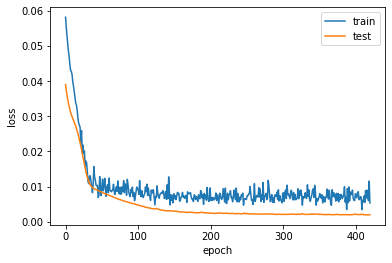

In [ ]:
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show()

Let's calculate our forecast.


In [ ]:
res_tr_LSTM = model.predict(train_x_LSTM)
res_ts_LSTM = model.predict(test_x_LSTM)
res_train_LSTM=scaler_y.inverse_transform(res_tr_LSTM).flatten()
res_test_LSTM=scaler_y.inverse_transform(res_ts_LSTM).flatten()

And accuracy:


In [ ]:
print("Correlation train", np.corrcoef(res_train, res_train_LSTM)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_LSTM)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_LSTM))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_LSTM)))

Correlation train 0.9920365806968812
Correlation train 0.9774559323204978
Mean Absolute Error: 47525.913711245834
Mean Squared Error: 6646426021.346161
Root Mean Squared Error: 81525.61573730162


As you can see, the forecast results of the test data set are much better than ones of the previous models. Let's visualize these 3 results:


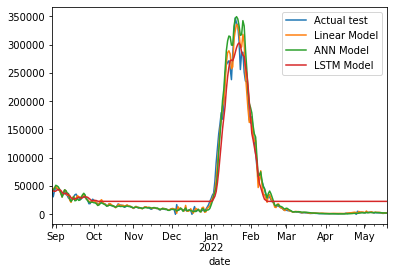

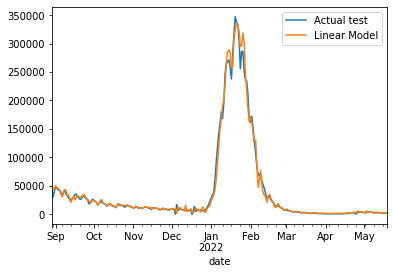

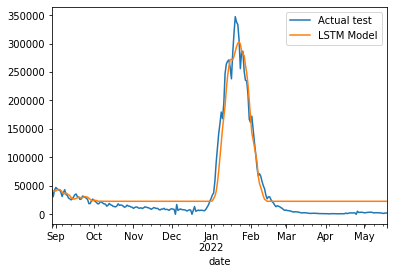

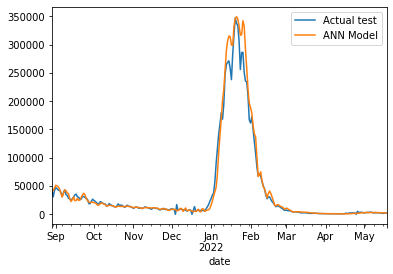

In [ ]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')
res_pred_test_LSTM = pd.Series(res_test_LSTM, name = 'Predicted test LSTM')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN,  'LSTM Model': res_pred_test_LSTM,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
df_2 = pd.DataFrame({'Actual test': res_test, 'LSTM Model': res_pred_test_LSTM,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
df_2 = pd.DataFrame({'Actual test': res_test,'ANN Model': res_pred_test_ANN,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
plt.show()

As you can see, an LSTM model makes a perfect forecast. A Linear Regression is the fastest forecasting model.
